In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from neuprint import Client

from config import conf
from dataset_utils import fetch_adjacency, fetch_rois_from_metadata, fetch_rois_from_df
from fh import flow_hierarchy


<h1>ROI checks</h1>

In [5]:
with open('primary_rois.txt','w') as f:
    for roi in primary_rois:
        f.write(roi+'\n')

In [2]:
#extract rois from various sources

c = Client(conf.neuprint_URL, conf.dataset_version)
all_rois, primary_rois, nonhierarchy_rois, toplevel_rois = fetch_rois_from_metadata(client=c)

_,conn_df = fetch_adjacency(include_nonprimary=True)
df_rois = fetch_rois_from_df(conn_df)

In [133]:
len(all_rois),len(primary_rois),len(nonhierarchy_rois),len(df_rois)

(151, 63, 6, 151)

In [142]:
#combine rois

combined_rois = list(set(all_rois+primary_rois+nonhierarchy_rois+df_rois+toplevel_rois))
rois = pd.DataFrame(data = combined_rois,columns=['combined_rois'])
roi_list = [all_rois,primary_rois,nonhierarchy_rois,toplevel_rois,df_rois]
x = [rois.apply(lambda x: 1*(x[0] in roi),axis=1) for roi in roi_list]
#roi_list_str = ['all_rois','df_rois','primary_rois','toplevel_rois','nonhierarchy_rois']
roi_list_str = ['all_rois','primary_rois','nonhierarchy_rois','toplevel_rois','df_rois']
rois = pd.concat([rois]+x,axis=1).rename(columns={i:str(roi) for i,roi in enumerate(roi_list_str)})

rois = rois.sort_values(by=['primary_rois','toplevel_rois'],ascending=False)
#rois = rois.reindex(columns=list(map(lambda x: rois.columns[x],[0,1,5,2,3,4])))

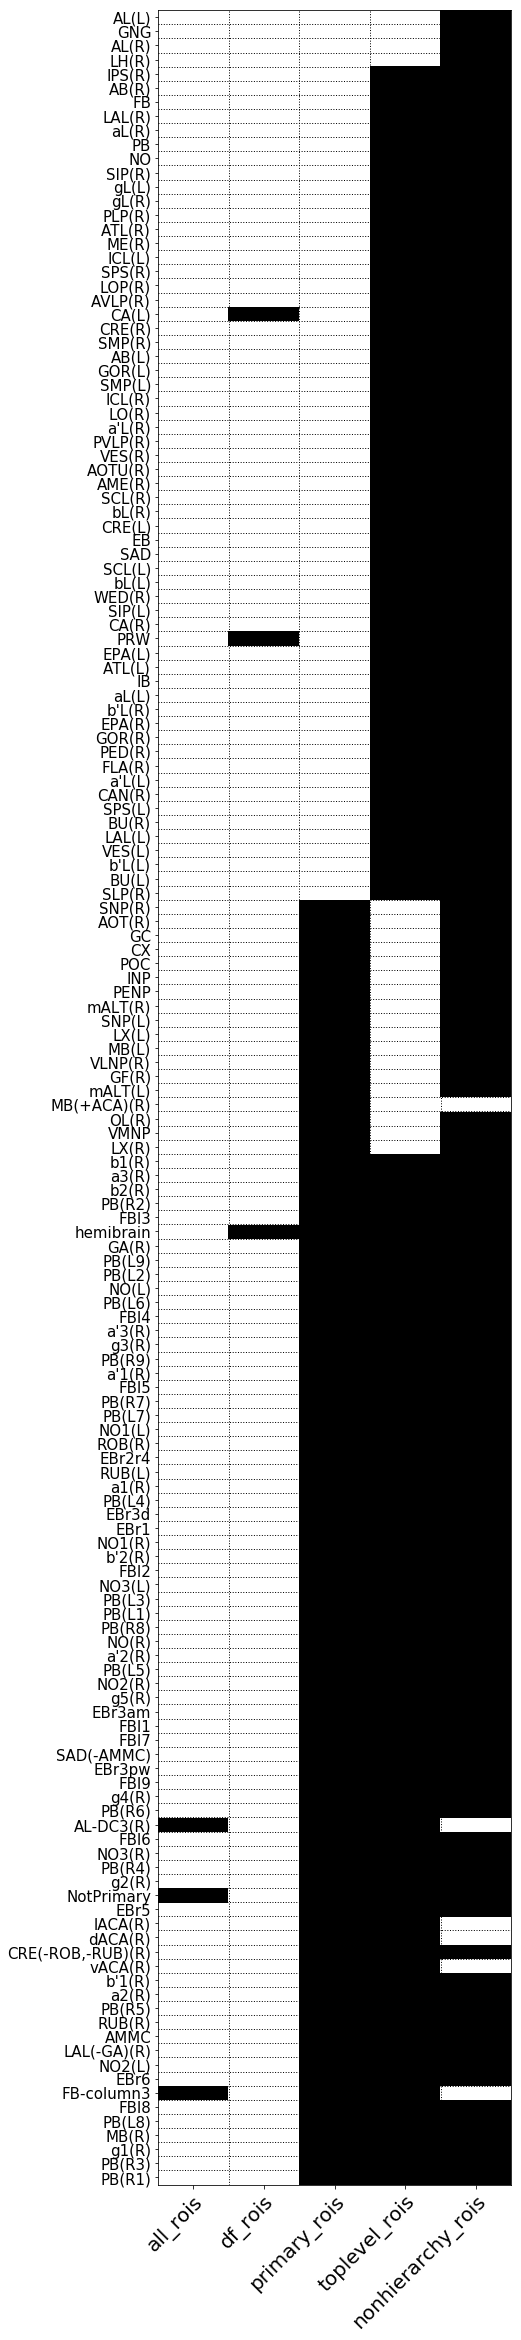

In [243]:
#plot similarities na differences between roi sets

plot_list = ['all_rois','df_rois','primary_rois','toplevel_rois','nonhierarchy_rois']
fig = plt.figure(figsize=(10,40))
t = rois[plot_list].to_numpy()
plt.imshow(t,cmap='gray')
ax = fig._get_axes()[0]
#ax.grid(True,drawstyle='steps-pre',markevery=1,linestyle=':')
for i in range(len(rois['combined_rois'])):
    ax.axhline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
for i in range(5):
    ax.axvline(float(i)+0.5, linestyle=':', color='k',linewidth=1)
ax.set_aspect(1/5)
ax.set_yticks([i for i in range(len(rois['combined_rois']))])
ax.set_yticklabels(list(rois['combined_rois'].values),fontsize=15)
ax.set_xticklabels([0]+plot_list,fontsize=20)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.show()


<h1>tests</h1>